<a href="https://colab.research.google.com/github/Nusuit/STAT3013.P11_Nhom3/blob/22520772_NguyenThiHuyenLinh/StaDes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict feedback and score in 2-3 months**

In [ ]:
import pandas as pd
import numpy as np
import statistics as st
from scipy import stats
import os
import matplotlib.pyplot as plt
import seaborn as sns


**1. Statistics Description:**

#DATASET order_items


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_item = pd.read_csv("/content/drive/MyDrive/Phân tích thống kê/Project/olist_dataset/olist_order_items_dataset.csv")
df_reviews = pd.read_csv("/content/drive/MyDrive/Phân tích thống kê/Project/olist_dataset/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("/content/drive/MyDrive/Phân tích thống kê/Project/olist_dataset/olist_orders_dataset.csv")
df_products = pd.read_csv("/content/drive/MyDrive/Phân tích thống kê/Project/olist_dataset/olist_products_dataset.csv")
df_geolocation = pd.read_csv("/content/drive/MyDrive/Phân tích thống kê/Project/olist_dataset/olist_geolocation_dataset.csv")
df_sellers = pd.read_csv("/content/drive/MyDrive/Phân tích thống kê/Project/olist_dataset/olist_sellers_dataset.csv")
df_order_pay = pd.read_csv("/content/drive/MyDrive/Phân tích thống kê/Project/olist_dataset/olist_order_payments_dataset.csv")
df_customers = pd.read_csv("/content/drive/MyDrive/Phân tích thống kê/Project/olist_dataset/olist_customers_dataset.csv")
df_category = pd.read_csv("/content/drive/MyDrive/Phân tích thống kê/Project/olist_dataset/product_category_name_translation.csv")

In [ ]:
# Check information of each DataFrame
df_item.info()
df_reviews.info()
df_orders.info()
df_products.info()
df_geolocation.info()
df_sellers.info()
df_order_pay.info()
df_customers.info()
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int

#Calculate the central trend measures

**Tính các chỉ số thống kê về đơn hàng của khách hàng**

**Products**

                             product_id  total_sales
22112  aca2eb7d00ea1a7b8ebd4e68314663af          527
19742  99a4788cb24856965c36a24e339b6058          488
8613   422879e10f46682990de24d770e7f83d          484
7364   389d119b48cf3043d311335e499d9c6b          392
7079   368c6c730842d78016ad823897a372db          388
10840  53759a2ecddad2bb87a079a1f1519f73          373
27039  d1c427060a0f73f6b889a5c7c61f2ac4          343
10867  53b36df67ebb7c41585e8d54d6772e08          323
2794   154e7e31ebfa092203795c972e5804a6          281
8051   3dd2a17168ec895c781a9191c1e95ad7          274


<ipython-input-5-24a88a921c89>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='product_id', data=top_10_products, palette='viridis')


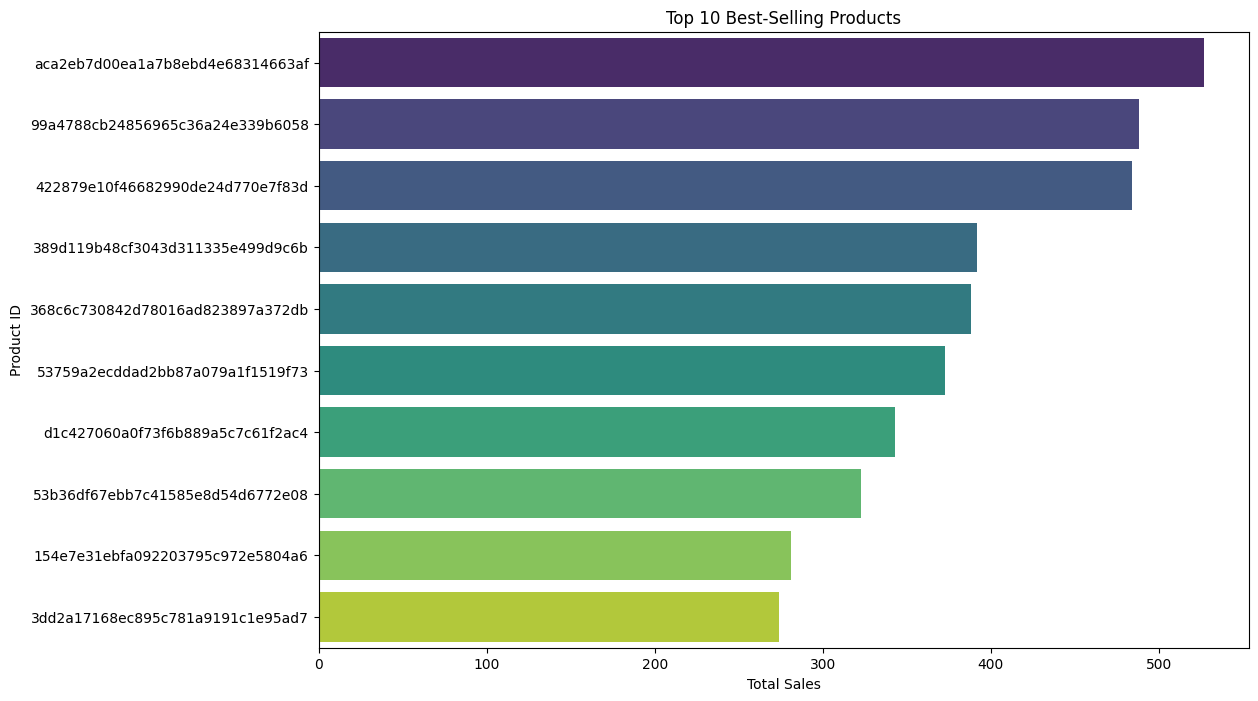

In [ ]:
product_sales = df_item.groupby('product_id').size().reset_index(name='total_sales')

# Sort products by the number of sales in descending order
product_sales = product_sales.sort_values(by='total_sales', ascending=False)

# Display the top 10 best-selling products
top_10_products = product_sales.head(10)
print(top_10_products)

# Plot a bar chart for the top 10 best-selling products
plt.figure(figsize=(12, 8))
sns.barplot(x='total_sales', y='product_id', data=top_10_products, palette='viridis')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product ID")
plt.show()


Top 10 Product Categories by Total Sales with English Names:
    product_category_name  total_sales product_category_name_english
0         cama_mesa_banho        11115                bed_bath_table
1            beleza_saude         9670                 health_beauty
2           esporte_lazer         8641                sports_leisure
3        moveis_decoracao         8334               furniture_decor
4  informatica_acessorios         7827         computers_accessories
5   utilidades_domesticas         6964                    housewares
6      relogios_presentes         5991                 watches_gifts
7               telefonia         4545                     telephony
8      ferramentas_jardim         4347                  garden_tools
9              automotivo         4235                          auto


<ipython-input-6-edb1ec8dc964>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='product_category_name_english', data=top_10_categories, palette='viridis')


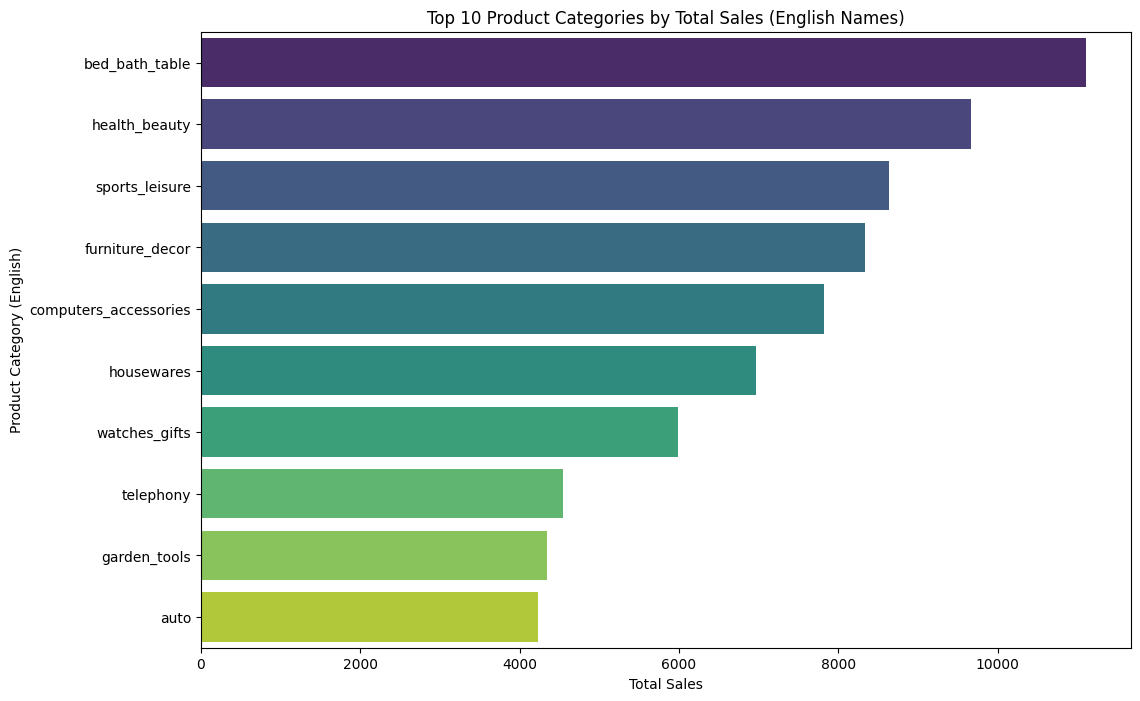

In [ ]:
# Merge product and order data to include category information for each product
df_merged = df_item.merge(df_products[['product_id', 'product_category_name']], on='product_id', how='left')

# Calculate total sales for each category
category_sales = df_merged['product_category_name'].value_counts().reset_index()
category_sales.columns = ['product_category_name', 'total_sales']

# Get the Top 10 best-selling categories
top_10_categories = category_sales.head(10)

# Merge with the translation table to add English names for the categories
top_10_categories = top_10_categories.merge(df_category, on='product_category_name', how='left')

# Display the result table
print("Top 10 Product Categories by Total Sales with English Names:")
print(top_10_categories)

# Plot a bar chart for the Top 10 categories with English names
plt.figure(figsize=(12, 8))
sns.barplot(x='total_sales', y='product_category_name_english', data=top_10_categories, palette='viridis')
plt.title("Top 10 Product Categories by Total Sales (English Names)")
plt.xlabel("Total Sales")
plt.ylabel("Product Category (English)")
plt.show()


In [ ]:
import numpy as np

# Calculate central tendency and dispersion measures for total sales of the top 10 categories
mean_sales = top_10_categories['total_sales'].mean()
median_sales = top_10_categories['total_sales'].median()
mode_sales = top_10_categories['total_sales'].mode().values[0]  # Get the first mode value if multiple modes exist

range_sales = top_10_categories['total_sales'].max() - top_10_categories['total_sales'].min()
variance_sales = top_10_categories['total_sales'].var()
std_dev_sales = top_10_categories['total_sales'].std()

# Print the results
print("Central Trend Measures for Total Sales of Top 10 Categories:")
print(f"Mean: {mean_sales}")
print(f"Median: {median_sales}")
print(f"Mode: {mode_sales}")
print("\nDispersion Measures for Total Sales of Top 10 Categories:")
print(f"Range: {range_sales}")
print(f"Variance: {variance_sales}")
print(f"Standard Deviation: {std_dev_sales}")


Central Trend Measures for Total Sales of Top 10 Categories:
Mean: 7166.9
Median: 7395.5
Mode: 4235

Dispersion Measures for Total Sales of Top 10 Categories:
Range: 6880
Variance: 5629996.766666668
Standard Deviation: 2372.761422197071


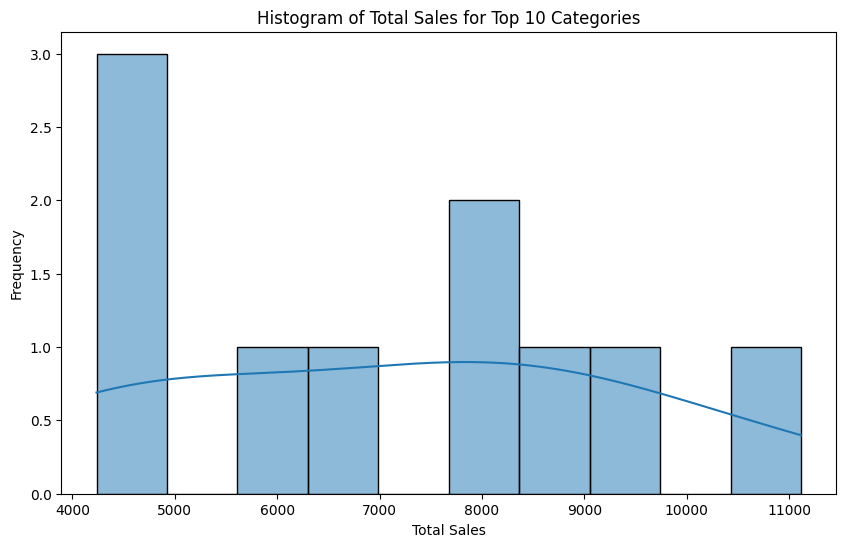

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(top_10_categories['total_sales'], bins=10, kde=True)
plt.title("Histogram of Total Sales for Top 10 Categories")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()


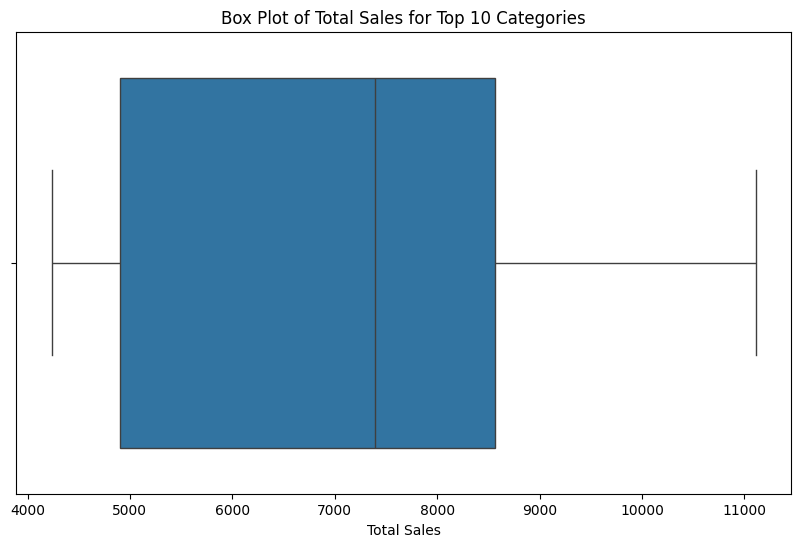

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=top_10_categories['total_sales'])
plt.title("Box Plot of Total Sales for Top 10 Categories")
plt.xlabel("Total Sales")
plt.show()


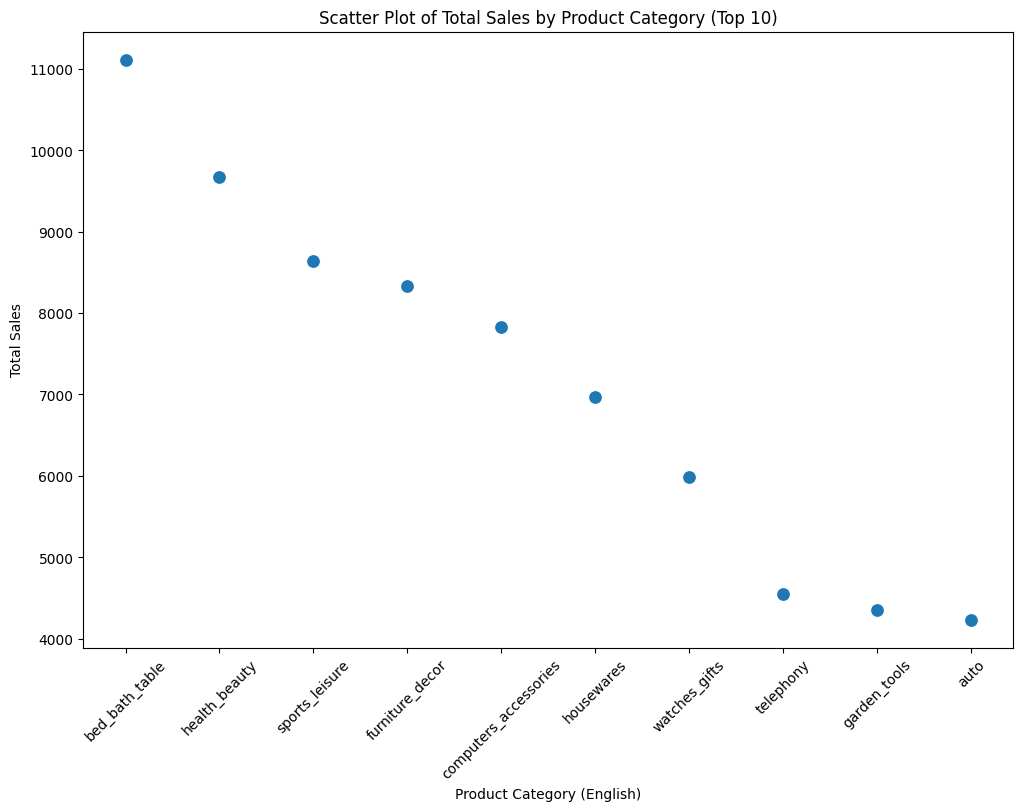

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='product_category_name_english', y='total_sales', data=top_10_categories, s=100)
plt.title("Scatter Plot of Total Sales by Product Category (Top 10)")
plt.xlabel("Product Category (English)")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


**Average Price that Customers often purchase**

Mean Product Price: 145.30246421050177
Median Product Price: 79.0
Mode Product Price: 59.9


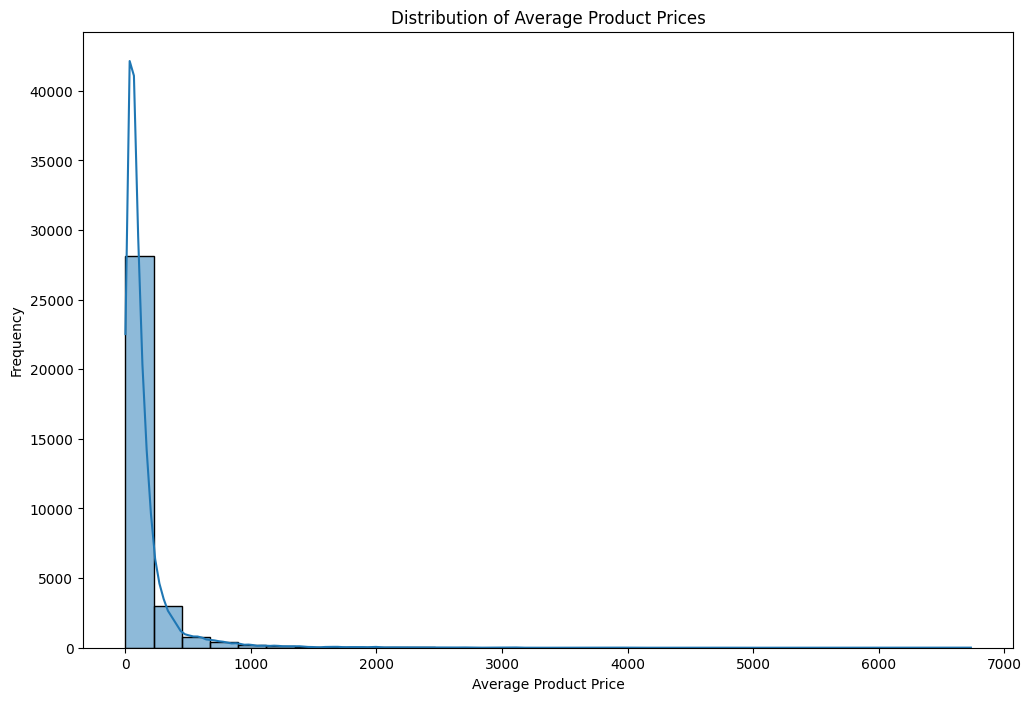

In [ ]:
# Calculate the average price for each product
product_prices = df_item.groupby('product_id')['price'].mean().reset_index(name='avg_price')

# Display basic statistics about product prices
mean_price = product_prices['avg_price'].mean()
median_price = product_prices['avg_price'].median()
mode_price = product_prices['avg_price'].mode()[0]

print("Mean Product Price:", mean_price)
print("Median Product Price:", median_price)
print("Mode Product Price:", mode_price)

# Histogram to visualize the distribution of product prices
plt.figure(figsize=(12, 8))
sns.histplot(product_prices['avg_price'], bins=30, kde=True)
plt.title("Distribution of Average Product Prices")
plt.xlabel("Average Product Price")
plt.ylabel("Frequency")
plt.show()


**When Customers mostly buy**

In [ ]:
# Convert the `order_purchase_timestamp` column to datetime format
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Extract information about day, month, quarter, and season of the year
df_orders['purchase_day'] = df_orders['order_purchase_timestamp'].dt.day_name()  # Day of the week
df_orders['purchase_month'] = df_orders['order_purchase_timestamp'].dt.month  # Month
df_orders['purchase_quarter'] = df_orders['order_purchase_timestamp'].dt.quarter  # Quarter

# Define the season (spring, summer, fall, winter) based on the month
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df_orders['purchase_season'] = df_orders['purchase_month'].apply(get_season)

# Check the results
print(df_orders[['order_purchase_timestamp', 'purchase_day', 'purchase_month', 'purchase_quarter', 'purchase_season']].head())


  order_purchase_timestamp purchase_day  purchase_month  purchase_quarter  \
0      2017-10-02 10:56:33       Monday              10                 4   
1      2018-07-24 20:41:37      Tuesday               7                 3   
2      2018-08-08 08:38:49    Wednesday               8                 3   
3      2017-11-18 19:28:06     Saturday              11                 4   
4      2018-02-13 21:18:39      Tuesday               2                 1   

  purchase_season  
0            Fall  
1          Summer  
2          Summer  
3            Fall  
4          Winter  


<ipython-input-13-6b4969dad1e0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarter_counts.index, y=quarter_counts.values, palette='viridis')


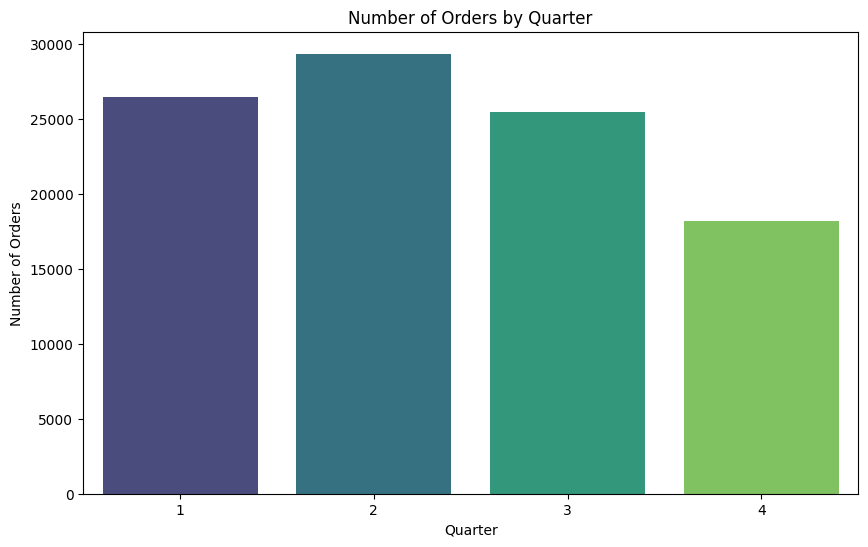

In [ ]:
# Count the number of orders by quarter
quarter_counts = df_orders['purchase_quarter'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=quarter_counts.index, y=quarter_counts.values, palette='viridis')
plt.title("Number of Orders by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Number of Orders")
plt.show()


<ipython-input-14-601b6a903112>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')


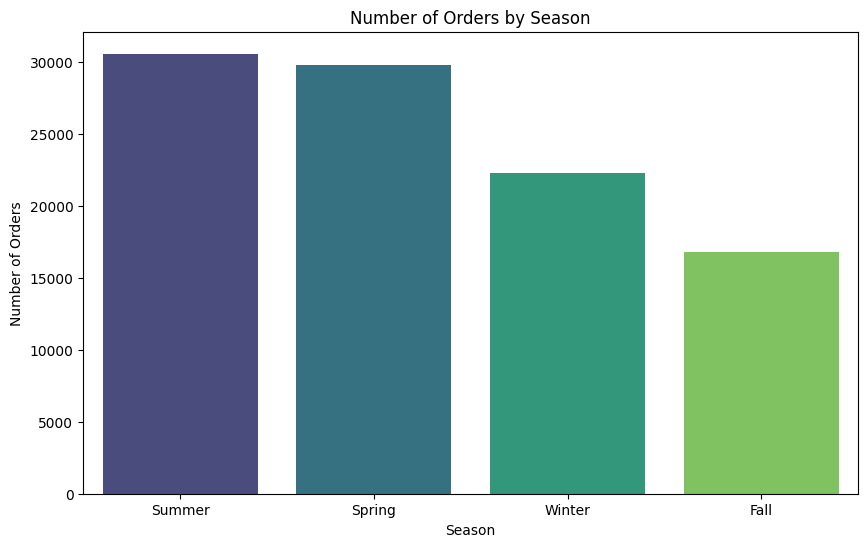

In [ ]:
# Count the number of orders by season
season_counts = df_orders['purchase_season'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
plt.title("Number of Orders by Season")
plt.xlabel("Season")
plt.ylabel("Number of Orders")
plt.show()


In [ ]:
# Convert the `order_purchase_timestamp` column to datetime format
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Extract the month from `order_purchase_timestamp`
df_orders['purchase_month'] = df_orders['order_purchase_timestamp'].dt.month

# Define the season based on the month
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df_orders['purchase_season'] = df_orders['purchase_month'].apply(get_season)

# Merge df_item and df_products to get category information for each product
df_combined = df_item.merge(df_products[['product_id', 'product_category_name']], on='product_id', how='left')

# Merge with df_orders to include seasonal purchase information
df_combined = df_combined.merge(df_orders[['order_id', 'purchase_season']], on='order_id', how='left')

# Calculate the total sales for each category by season
category_season_sales = df_combined.groupby(['product_category_name', 'purchase_season']).size().reset_index(name='total_sales')

# Find the best-selling category for each season
best_selling_categories = category_season_sales.loc[category_season_sales.groupby('purchase_season')['total_sales'].idxmax()]

print("Best-Selling Categories by Season:")
print(best_selling_categories)


Best-Selling Categories by Season:
   product_category_name purchase_season  total_sales
50       cama_mesa_banho            Fall         2061
51       cama_mesa_banho          Spring         3223
52       cama_mesa_banho          Summer         3528
53       cama_mesa_banho          Winter         2303


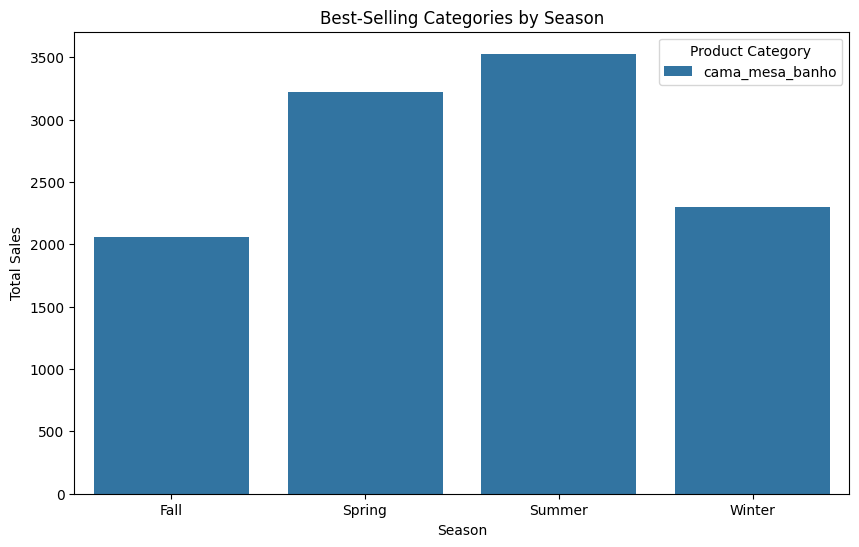

In [ ]:
# Bar chart showing the best-selling categories for each season
plt.figure(figsize=(10, 6))
sns.barplot(data=best_selling_categories, x='purchase_season', y='total_sales', hue='product_category_name')
plt.title("Best-Selling Categories by Season")
plt.xlabel("Season")
plt.ylabel("Total Sales")
plt.legend(title="Product Category")
plt.show()


**RFM**

Missing values in RFM dataset:
customer_id    0
Recency        0
Frequency      0
Monetary       0
R_Score        0
F_Score        0
M_Score        0
RFM_Segment    0
dtype: int64


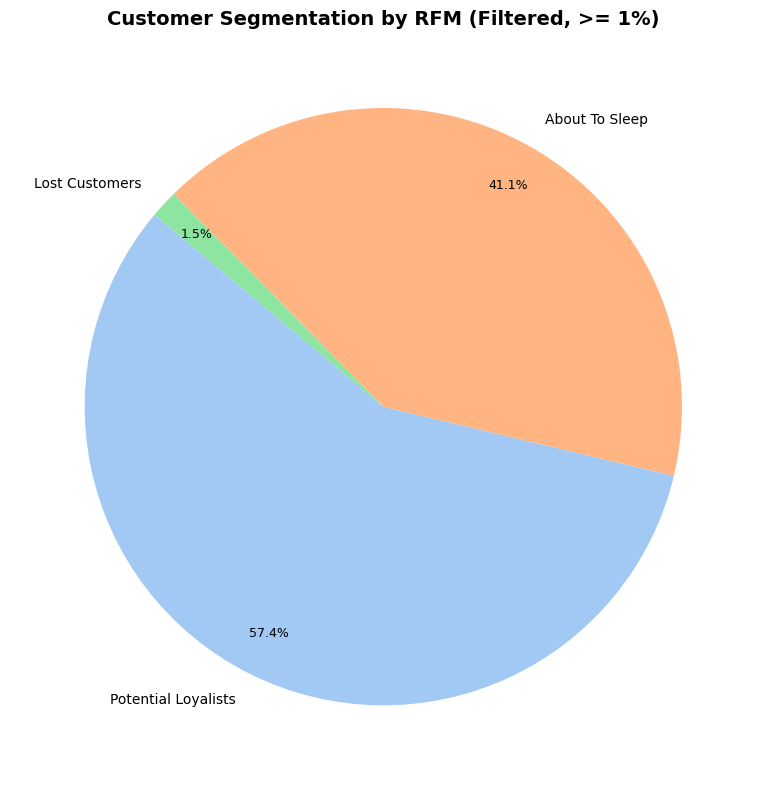

<ipython-input-17-d8e09997b491>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


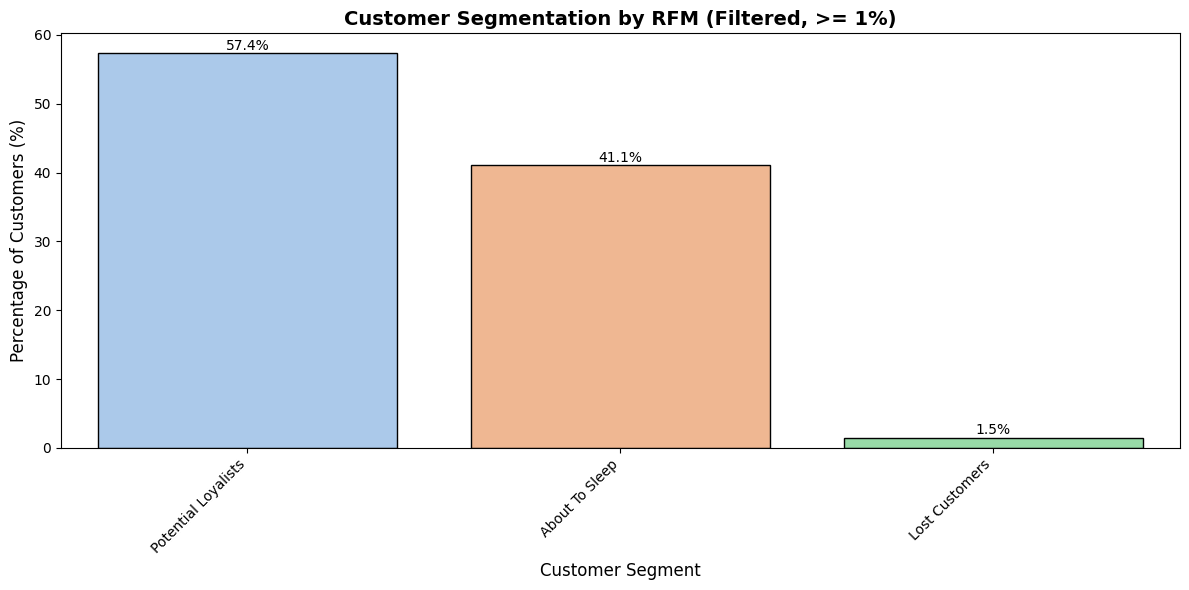

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert `order_purchase_timestamp` to datetime format
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Reference date: the day after the last purchase date in the dataset
reference_date = df_orders['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Calculate Recency and Frequency at the customer level
rfm = df_orders.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'nunique',  # Frequency
}).reset_index()

# Calculate Monetary value (total price per customer) using order_items
order_monetary = df_item.groupby('order_id')['price'].sum().reset_index()
orders_with_value = df_orders.merge(order_monetary, on='order_id', how='left')
monetary = orders_with_value.groupby('customer_id')['price'].sum().reset_index().rename(columns={'price': 'Monetary'})

# Merge Monetary value into the RFM table
rfm = rfm.merge(monetary, on='customer_id', how='left')

# Rename columns for clarity
rfm.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
}, inplace=True)

# Bin Recency, Frequency, and Monetary for scoring
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=5, labels=[5, 4, 3, 2, 1], include_lowest=True)
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=5, labels=[1, 2, 3, 4, 5], include_lowest=True)
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=5, labels=[1, 2, 3, 4, 5], include_lowest=True)

# Create RFM segment by combining scores
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Check for missing or invalid data before processing
print("Missing values in RFM dataset:")
print(rfm.isnull().sum())

# Ensure 'Frequency' and 'Monetary' values are valid (not zero or NaN)
rfm = rfm[(rfm['Frequency'] > 0) & (rfm['Monetary'] > 0)]

# Assign customer segments based on RFM_Segment
# Assign customer segments based on RFM_Segment
def assign_segment(rfm_segment):
    if rfm_segment in ["555", "554", "545", "454", "445", "455"]:
        return "Champions"
    elif rfm_segment in ["543", "544", "435", "355", "354", "345", "344", "335"]:
        return "Loyal Customers"
    elif rfm_segment in ["553", "551", "552", "541", "542", "533", "532", "531",
                         "452", "451", "442", "441", "431", "453", "433", "432",
                         "423", "353", "352", "351", "342", "341", "333", "323"]:
        return "Potential Loyalists"
    elif rfm_segment in ["512", "511", "422", "421", "412", "411", "311"]:
        return "New Customers"
    elif rfm_segment in ["525", "524", "523", "522", "521", "515", "514", "513",
                         "425", "424", "414", "415", "315", "314", "313"]:
        return "Promising"
    elif rfm_segment in ["535", "534", "433", "434", "343", "334", "325", "324"]:
        return "Need Attention"
    elif rfm_segment in ["331", "321", "312", "221", "213", "231", "241", "251"]:
        return "About To Sleep"
    elif rfm_segment in ["255", "254", "245", "244", "253", "252", "243", "242",
                         "235", "234", "225", "224", "153", "152", "145", "143",
                         "142", "135", "134", "133", "125", "124"]:
        return "At Risk"
    elif rfm_segment in ["155", "154", "144", "214", "215", "115", "114", "113"]:
        return "Cannot Lose Them"
    elif rfm_segment in ["332", "322", "233", "232", "223", "222", "132", "123",
                         "122", "211"]:
        return "Hibernating"
    elif rfm_segment in ["111", "112", "121", "131", "141", "151"]:
        return "Lost Customers"
    else:
        return "Other"

# Apply the updated segment assignment
rfm['Customer_Segment'] = rfm['RFM_Segment'].apply(assign_segment)

# Plot pie chart of customer segments
segment_counts = rfm['Customer_Segment'].value_counts(normalize=True) * 100

# Lọc chỉ những nhóm có tỷ lệ >= 1%
filtered_segment_counts = segment_counts[segment_counts >= 1]

# Vẽ biểu đồ tròn mà không sử dụng explode
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    filtered_segment_counts,
    labels=filtered_segment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel"),
    pctdistance=0.85  # Định vị tỷ lệ phần trăm gần hơn tâm
)

# Cải thiện định dạng nhãn
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(9)
    autotext.set_color("black")

plt.title("Customer Segmentation by RFM (Filtered, >= 1%)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cột sau khi lọc
plt.figure(figsize=(12, 6))
sns.barplot(
    x=filtered_segment_counts.index,
    y=filtered_segment_counts.values,
    palette="pastel",
    edgecolor="black"
)
plt.title("Customer Segmentation by RFM (Filtered, >= 1%)", fontsize=14, fontweight='bold')
plt.xlabel("Customer Segment", fontsize=12)
plt.ylabel("Percentage of Customers (%)", fontsize=12)

# Thêm giá trị trên mỗi cột
for index, value in enumerate(filtered_segment_counts.values):
    plt.text(index, value + 0.5, f"{value:.1f}%", ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
!pip install squarify

In [ ]:
orders_with_value = orders_with_value.merge(
    df_customers[['customer_id', 'customer_state']],
    on='customer_id',
    how='left'
)
print(orders_with_value.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
 8   purchase_day                   99441 non-null  object        
 9   purchase_month                 99441 non-null  int32         
 10  purchase_quarter               99441 non-null  int32         
 11  purchase_season

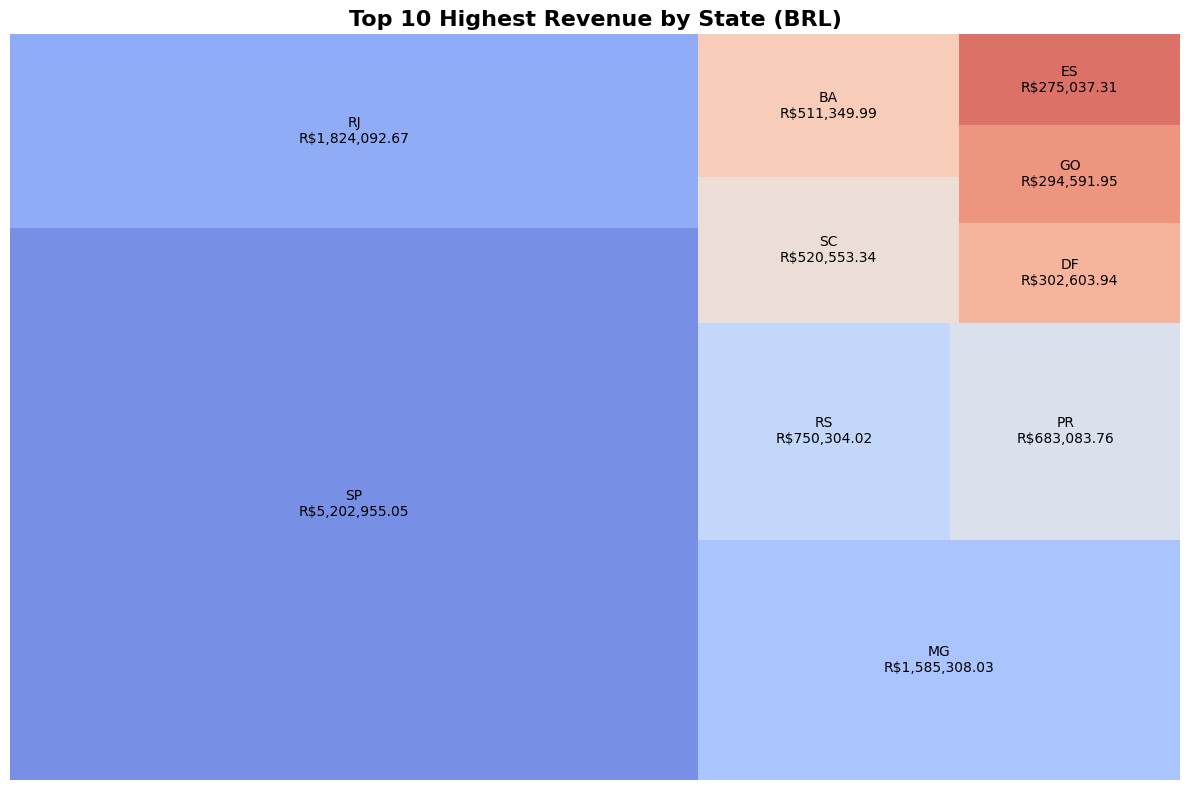

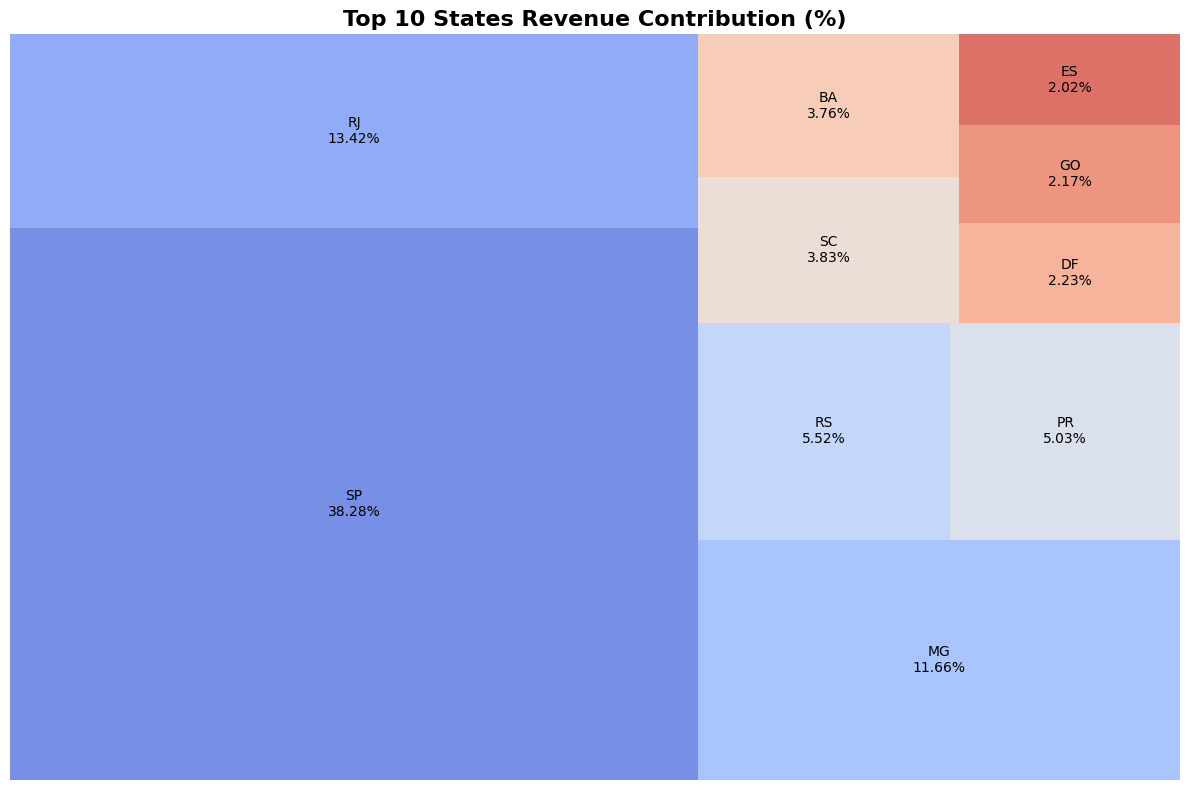

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # If not installed, run: pip install squarify

# Use the correct column for customer state
state_column = 'customer_state'

# Group by customer_state and calculate total revenue
state_revenue = orders_with_value.groupby(state_column)['price'].sum().reset_index().rename(columns={'price': 'revenue'})

# Calculate the percentage contribution of each state
state_revenue['percentage'] = (state_revenue['revenue'] / state_revenue['revenue'].sum()) * 100

# Sort states by revenue in descending order and take the top 10
top_10_states = state_revenue.sort_values(by='revenue', ascending=False).head(10)

# Treemap showing revenue values
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=top_10_states['revenue'],
    label=[f"{state}\nR${revenue:,.2f}" for state, revenue in zip(top_10_states[state_column], top_10_states['revenue'])],
    alpha=0.8,
    color=sns.color_palette('coolwarm', len(top_10_states))
)

plt.title("Top 10 Highest Revenue by State (BRL)", fontsize=16, fontweight='bold')
plt.axis('off')  # Hide the axes
plt.tight_layout()
plt.show()

# Treemap showing percentage contribution
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=top_10_states['revenue'],
    label=[
        f"{state}\n{percentage:.2f}%"
        for state, percentage in zip(top_10_states[state_column], top_10_states['percentage'])
    ],
    alpha=0.8,
    color=sns.color_palette('coolwarm', len(top_10_states))
)

plt.title("Top 10 States Revenue Contribution (%)", fontsize=16, fontweight='bold')
plt.axis('off')  # Hide the axes
plt.tight_layout()
plt.show()


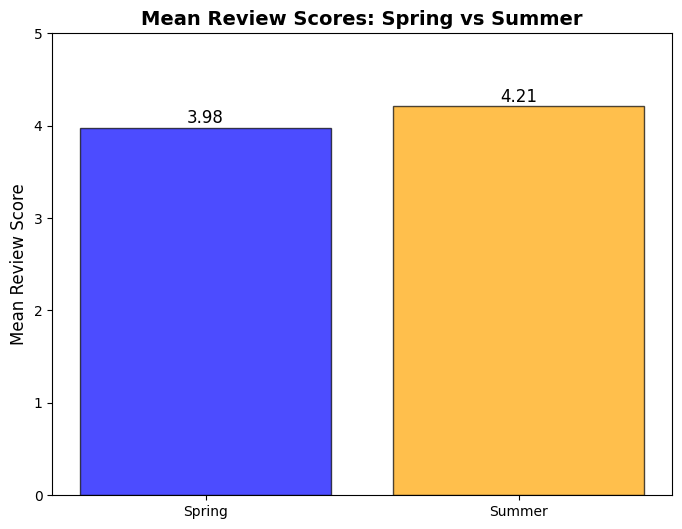

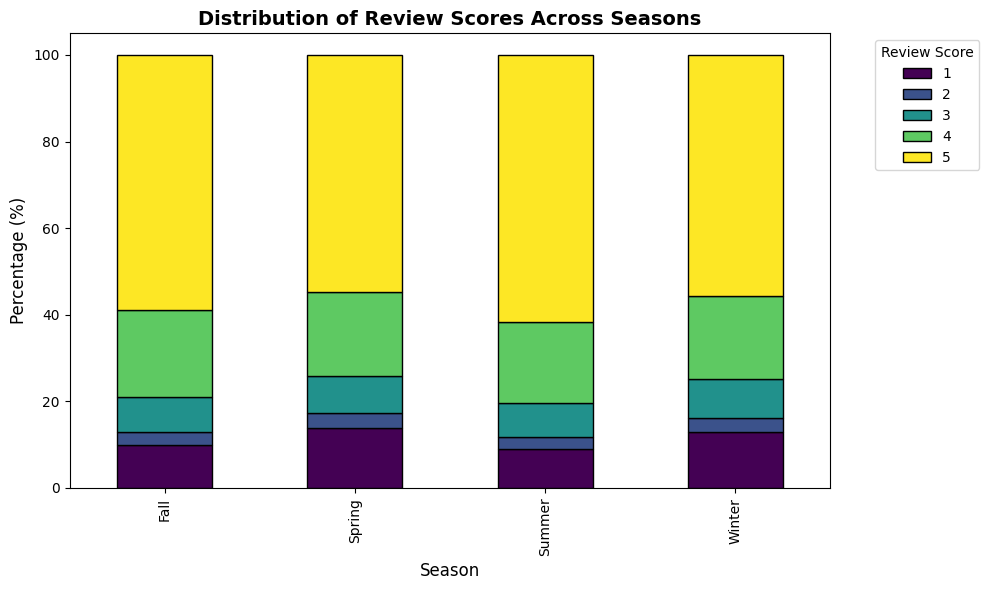

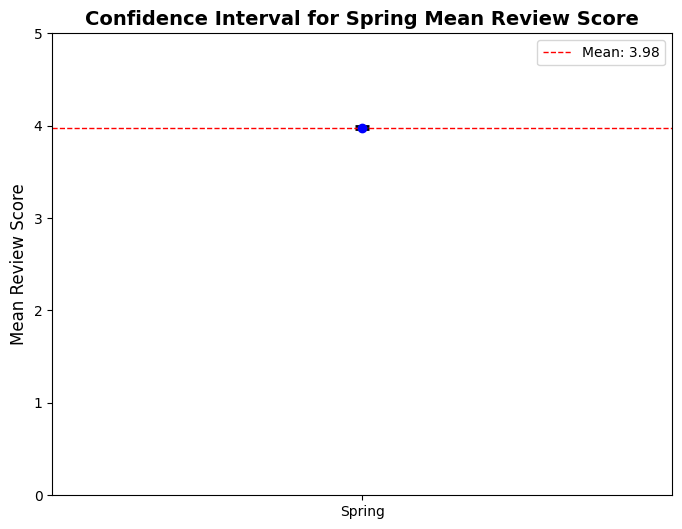

In [ ]:
# Import necessary libraries
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
import numpy as np
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date columns to datetime format
df_reviews['review_creation_date'] = pd.to_datetime(df_reviews['review_creation_date'])

# Extract month and season information
df_reviews['month'] = df_reviews['review_creation_date'].dt.month

# Define a function to classify seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df_reviews['season'] = df_reviews['month'].apply(get_season)

# Hypothesis Testing: T-Test for comparing review scores between two seasons (e.g., Spring and Summer)
spring_reviews = df_reviews[df_reviews['season'] == 'Spring']['review_score']
summer_reviews = df_reviews[df_reviews['season'] == 'Summer']['review_score']
t_stat, t_p_value = ttest_ind(spring_reviews, summer_reviews, nan_policy='omit')

# Chi-Square Test: Comparing frequency of review scores across seasons
review_season_table = pd.crosstab(df_reviews['season'], df_reviews['review_score'])
chi2_stat, chi2_p_value, _, _ = chi2_contingency(review_season_table)

# Confidence Interval for Mean Review Scores in Spring
spring_mean = np.mean(spring_reviews)
ci_lower, ci_upper = sms.DescrStatsW(spring_reviews).tconfint_mean()

# Visualize T-Test results (Spring vs Summer mean review scores)
mean_scores = {
    "Spring": spring_mean,
    "Summer": np.mean(summer_reviews)
}
plt.figure(figsize=(8, 6))
plt.bar(mean_scores.keys(), mean_scores.values(), color=['blue', 'orange'], alpha=0.7, edgecolor='black')
plt.title("Mean Review Scores: Spring vs Summer", fontsize=14, fontweight='bold')
plt.ylabel("Mean Review Score", fontsize=12)
plt.ylim(0, 5)  # Assuming review scores are on a scale of 1-5
for index, value in enumerate(mean_scores.values()):
    plt.text(index, value + 0.05, f"{value:.2f}", ha='center', fontsize=12)
plt.show()

# Visualize Chi-Square Test results (Frequency distribution of review scores across seasons)
review_season_table_percentage = review_season_table.div(review_season_table.sum(axis=1), axis=0) * 100
review_season_table_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title("Distribution of Review Scores Across Seasons", fontsize=14, fontweight='bold')
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Season", fontsize=12)
plt.legend(title="Review Score", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

# Visualize Confidence Interval for Spring Mean Review Scores
plt.figure(figsize=(8, 6))
plt.errorbar(x=["Spring"], y=[spring_mean], yerr=[[spring_mean - ci_lower], [ci_upper - spring_mean]], fmt='o', color='blue', capsize=5, capthick=2, ecolor='black')
plt.title("Confidence Interval for Spring Mean Review Score", fontsize=14, fontweight='bold')
plt.ylabel("Mean Review Score", fontsize=12)
plt.ylim(0, 5)
plt.axhline(y=spring_mean, color='red', linestyle='--', linewidth=1, label=f"Mean: {spring_mean:.2f}")
plt.legend(loc='upper right', fontsize=10)
plt.show()


1. Mean Review Scores: Spring vs Summer
Điểm nổi bật: Biểu đồ cột cho thấy điểm trung bình của Spring là 3.98 và của Summer là 4.21.
Ý nghĩa: Sự khác biệt này có thể gợi ý rằng đánh giá của khách hàng thay đổi theo mùa, với điểm cao hơn vào mùa Summer.
Hành động: Kiểm tra kỹ ý nghĩa thống kê từ T-Test (p-value) để xem liệu sự khác biệt này có ý nghĩa thống kê hay không.
2. Distribution of Review Scores Across Seasons
Điểm nổi bật: Biểu đồ phân bố theo phần trăm cho thấy đánh giá 5 sao chiếm ưu thế ở tất cả các mùa, nhưng tỷ lệ 4 sao và các mức đánh giá thấp hơn (1-3 sao) khác nhau giữa các mùa.
Ý nghĩa: Các yếu tố theo mùa có thể ảnh hưởng đến mức độ hài lòng của khách hàng.
Hành động: Sử dụng kết quả kiểm định Chi-Square để xem liệu sự khác biệt về phân bố này có ý nghĩa thống kê không.
3. Confidence Interval for Spring Mean Review Score
Điểm nổi bật: Biểu đồ hiển thị khoảng tin cậy hẹp, với trung bình Spring là 3.98.
Ý nghĩa: Với khoảng tin cậy chặt chẽ, chúng ta có thể tự tin rằng điểm trung bình thực sự của Spring nằm trong khoảng này.
Hành động: So sánh với các mùa khác để xác nhận sự khác biệt giữa các khoảng tin cậy.

In [ ]:
# T-Test Analysis
if t_p_value < 0.05:
    print("T-Test: The difference in mean review scores between Spring and Summer is statistically significant.")
    print(f"T-Statistic: {t_stat:.2f}, P-Value: {t_p_value:.5f}")
else:
    print("T-Test: The difference in mean review scores between Spring and Summer is NOT statistically significant.")
    print(f"T-Statistic: {t_stat:.2f}, P-Value: {t_p_value:.5f}")

# Chi-Square Analysis
if chi2_p_value < 0.05:
    print("Chi-Square Test: The distribution of review scores across seasons is statistically significant.")
    print(f"Chi2-Statistic: {chi2_stat:.2f}, P-Value: {chi2_p_value:.5f}")
else:
    print("Chi-Square Test: The distribution of review scores across seasons is NOT statistically significant.")
    print(f"Chi2-Statistic: {chi2_stat:.2f}, P-Value: {chi2_p_value:.5f}")

# Confidence Interval Analysis
print(f"Spring Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")
print(f"Spring Mean: {spring_mean:.2f}")
summer_ci_lower, summer_ci_upper = sms.DescrStatsW(summer_reviews).tconfint_mean()
print(f"Summer Confidence Interval: ({summer_ci_lower:.2f}, {summer_ci_upper:.2f})")
print(f"Summer Mean: {np.mean(summer_reviews):.2f}")

# Comparing Confidence Intervals
if ci_upper < summer_ci_lower or ci_lower > summer_ci_upper:
    print("The confidence intervals for Spring and Summer do NOT overlap, indicating a statistically significant difference.")
else:
    print("The confidence intervals for Spring and Summer overlap, indicating the difference might not be statistically significant.")


T-Test: The difference in mean review scores between Spring and Summer is statistically significant.
T-Statistic: -22.16, P-Value: 0.00000
Chi-Square Test: The distribution of review scores across seasons is statistically significant.
Chi2-Statistic: 598.34, P-Value: 0.00000
Spring Confidence Interval: (3.96, 3.99)
Spring Mean: 3.98
Summer Confidence Interval: (4.20, 4.22)
Summer Mean: 4.21
The confidence intervals for Spring and Summer do NOT overlap, indicating a statistically significant difference.


In [ ]:
seasons = df_reviews['season'].unique()
season_stats = {}

for season in seasons:
    reviews = df_reviews[df_reviews['season'] == season]['review_score']
    mean = np.mean(reviews)
    ci_lower, ci_upper = sms.DescrStatsW(reviews).tconfint_mean()
    season_stats[season] = {
        "Mean": mean,
        "CI_Lower": ci_lower,
        "CI_Upper": ci_upper,
        "Std_Dev": np.std(reviews, ddof=1),
    }

print("Seasonal Statistics:")
for season, stats in season_stats.items():
    print(f"{season}: Mean = {stats['Mean']:.2f}, CI = ({stats['CI_Lower']:.2f}, {stats['CI_Upper']:.2f}), Std Dev = {stats['Std_Dev']:.2f}")


Seasonal Statistics:
Winter: Mean = 4.02, CI = (4.00, 4.03), Std Dev = 1.39
Spring: Mean = 3.98, CI = (3.96, 3.99), Std Dev = 1.42
Summer: Mean = 4.21, CI = (4.20, 4.22), Std Dev = 1.25
Fall: Mean = 4.15, CI = (4.13, 4.17), Std Dev = 1.29
